In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely 
import sklearn as sk
import matplotlib.pyplot as plt

# Compute distance matrices

creates *'data/distance_matrix.csv'*

uses *'data/mosa_loneliness.csv'*


This file is meant to compute distance matrices and put them in a CSV file.

This is a separate file because it takes n\*n iterations, n being the number of MSOA areas (~7000)

In [13]:
data = pd.read_csv('data/msoa_loneliness.csv', index_col=0)
msoa_desirability = pd.read_csv('data/desirability_by_msoa.csv')
msoa_desirability = msoa_desirability.rename(columns={"MSOA Code":"MSOA"})
data = data.rename(columns={"msoa11cd":"MSOA"})

n_old = len(data.index)
data = data.merge(msoa_desirability, on='MSOA', how='inner')

n = len(data.index)

print('Lost ' + str(n_old - n) + ' out of ' + str(n_old) + ' values w/o associated desirability')  

Lost 1895 out of 6791 values w/o associated desirability


In [36]:
geo_data = gpd.GeoDataFrame(data = data[['desirability.metric', 'loneills_2018']],
                            crs = 'epsg:27700', 
                            geometry = data['geometry'].apply(shapely.wkt.loads))
geo_data_points = gpd.GeoDataFrame(data = data[['desirability.metric', 'loneills_2018']],
                            crs = 'epsg:27700', 
                            geometry = geo_data['geometry'].centroid )
geo_data_points = geo_data_points.rename(dict(enumerate(data['MSOA'])))

computing the distances :

In [ ]:
matrix = geo_data_points['geometry'].apply(geo_data_points['geometry'].distance)
#matrix.to_csv('data/distance_matrix.csv')

In [ ]:
matrix.to_csv('data/distance_matrix.csv')

/usr/bin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


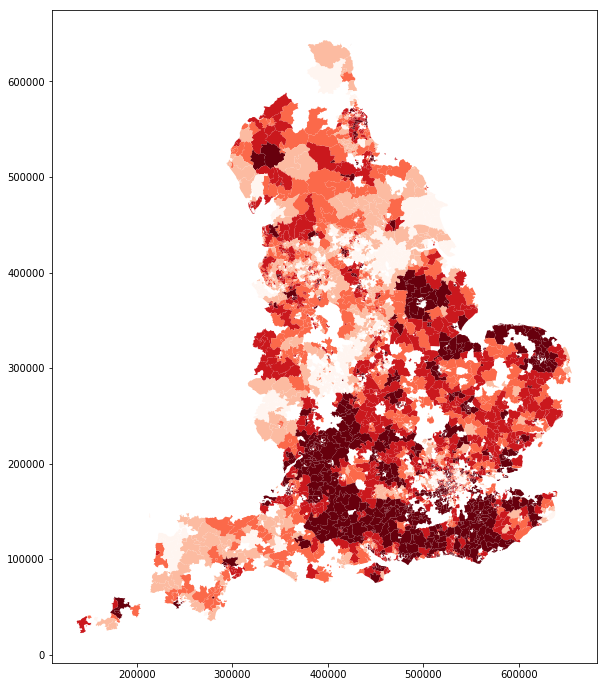

In [22]:
geo_data.plot(column='loneills_2018', scheme = 'quantiles', cmap = 'Reds', figsize = (32,12))

# Compute N nearest neighboors

creates *'data/N_nearest_neighboors.csv'*

uses *'data/distance_matrix.csv'*

In [3]:
data = pd.read_csv('data/distance_matrix.csv', index_col=0)

In [4]:
N = 1000
columns = []
for i in range(N):
    columns.append('N' + str(i))
for i in range(N):
    columns.append('N' + str(i) + '_length')

KNN = pd.DataFrame(columns=columns)
    

for column in data.columns:
    row = []
    smallest_distances = data[column].nsmallest(N+1)[1:]
    row += list(smallest_distances.index)
    row += list(smallest_distances)
    KNN = KNN.append(pd.Series(row,index=columns, name=column))
    

In [5]:
KNN.to_csv('data/' + str(N) + '_nearest_neighboors.csv')